In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


In [73]:
from bs4 import BeautifulSoup

In [3]:
toronto_url ="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [4]:
html = requests.get(toronto_url)
soup = BeautifulSoup(html.text,'html.parser')
# obtain the content of the html
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [5]:
# loading GeoSpatial Dataset
geo_data=pd.read_csv('Geospatial_Coordinates.csv')
geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [6]:
data_toronto=df.merge(geo_data,left_on='PostalCode',right_on='Postal Code',how='inner')
data_toronto=data_toronto.drop(columns='Postal Code')
data_toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [7]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [74]:
print('The dataframe has {} borough and {} neighborhoods'.format(
        len(data_toronto['Borough'].unique()),
        data_toronto.shape[0]))

The dataframe has 15 borough and 103 neighborhoods


## create map of Toronto using latitude and longtitude values

In [9]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(data_toronto['Latitude'],data_toronto['Longitude'], data_toronto['Borough'], data_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [79]:
data_toronto.loc[2, 'Neighborhood']

'Regent Park, Harbourfront'

In [80]:
neighborhood_latitude = data_toronto.loc[2, 'Latitude']
neighborhood_longitude = data_toronto.loc[2, 'Longitude']

In [26]:
CLIENT_ID = '24QWVYS23CC2MNPQY51XOIO5YP4W03PTVEZKRMEUZYBRIZW4' # your Foursquare ID
CLIENT_SECRET = '05LNMJNVO4JXNY5U0YQ3DRASQI1OWB34Q2QMWSWYSGODMTVL' # your Foursquare Secret
ACCESS_TOKEN = 'NZLCK5JB5RH2ESFGAPTFHLPTZS2OCUXZYLQTLRZAM2JY30CN' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 24QWVYS23CC2MNPQY51XOIO5YP4W03PTVEZKRMEUZYBRIZW4
CLIENT_SECRET:05LNMJNVO4JXNY5U0YQ3DRASQI1OWB34Q2QMWSWYSGODMTVL


In [27]:
'''
search_query = 'Restaurant'
radius = 500
print(search_query + ' .... OK!')
'''

Restaurant .... OK!


In [81]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [28]:
'''
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    latitude, 
    longitude,
    ACCESS_TOKEN, 
    VERSION, 
    search_query, 
    radius, 
    LIMIT)
url
'''

'https://api.foursquare.com/v2/venues/search?client_id=24QWVYS23CC2MNPQY51XOIO5YP4W03PTVEZKRMEUZYBRIZW4&client_secret=05LNMJNVO4JXNY5U0YQ3DRASQI1OWB34Q2QMWSWYSGODMTVL&ll=43.6534817,-79.3839347&oauth_token=NZLCK5JB5RH2ESFGAPTFHLPTZS2OCUXZYLQTLRZAM2JY30CN&v=20180604&query=Restaurant&radius=500&limit=1000'

In [82]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '607fdfc5c7e55c47644e5acc'},
 'response': {'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 47,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.653446723052674,
          'lng': -79.3620167174383}],
        'distance': 143,
       

In [87]:
venues = results['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-54ea41ad498e9a11e9e13308-0,0,"[{'summary': 'This spot is popular', 'type': '...",54ea41ad498e9a11e9e13308,Roselle Desserts,362 King St E,Trinity St,43.653447,-79.362017,"[{'label': 'display', 'lat': 43.65344672305267...",143,M5A 1K9,CA,Toronto,ON,Canada,"[362 King St E (Trinity St), Toronto ON M5A 1K...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN
1,e-0-53b8466a498e83df908c3f21-1,0,"[{'summary': 'This spot is popular', 'type': '...",53b8466a498e83df908c3f21,Tandem Coffee,368 King St E,at Trinity St,43.653559,-79.361809,"[{'label': 'display', 'lat': 43.65355870959944...",122,NaN,CA,Toronto,ON,Canada,"[368 King St E (at Trinity St), Toronto ON, Ca...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,NaN
2,e-0-574c229e498ebb5c6b257902-2,0,"[{'summary': 'This spot is popular', 'type': '...",574c229e498ebb5c6b257902,Cooper Koo Family YMCA,461 Cherry St,NaN,43.653249,-79.358008,"[{'label': 'display', 'lat': 43.65324910177244...",239,M5A 0H7,CA,Toronto,ON,Canada,"[461 Cherry St, Toronto ON M5A 0H7, Canada]","[{'id': '52e81612bcbc57f1066b7a37', 'name': 'D...",0,[],NaN,NaN
3,e-0-50760559e4b0e8c7babe2497-3,0,"[{'summary': 'This spot is popular', 'type': '...",50760559e4b0e8c7babe2497,Body Blitz Spa East,497 King Street East,btwn Sackville St and Sumach St,43.654735,-79.359874,"[{'label': 'display', 'lat': 43.65473505045365...",80,M5A 1L9,CA,Toronto,ON,Canada,[497 King Street East (btwn Sackville St and S...,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",0,[],NaN,NaN
4,e-0-51ccc048498ec7792efc955e-4,0,"[{'summary': 'This spot is popular', 'type': '...",51ccc048498ec7792efc955e,Corktown Common,NaN,NaN,43.655618,-79.356211,"[{'label': 'display', 'lat': 43.65561779974973...",387,NaN,CA,NaN,NaN,Canada,[Canada],"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN


In [89]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['venue.name','venue.categories','venue.location.lat','venue.location.lng']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Corktown Common,Park,43.655618,-79.356211
5,Impact Kitchen,Restaurant,43.656369,-79.356980
6,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
7,The Extension Room,Gym / Fitness Center,43.653313,-79.359725
8,The Distillery Historic District,Historic Site,43.650244,-79.359323
9,Distillery Sunday Market,Farmers Market,43.650075,-79.361832


In [90]:
dataframe_filtered.name

0                         Roselle Desserts
1                            Tandem Coffee
2                   Cooper Koo Family YMCA
3                      Body Blitz Spa East
4                          Corktown Common
5                           Impact Kitchen
6                       Morning Glory Cafe
7                       The Extension Room
8         The Distillery Historic District
9                 Distillery Sunday Market
10                     SOMA chocolatemaker
11                  Figs Breakfast & Lunch
12                          Rooster Coffee
13                                    Arvo
14                               Starbucks
15                         Sumach Espresso
16                Dominion Pub and Kitchen
17    Young Centre for the Performing Arts
18                          Underpass Park
19                                Cacao 70
20                 Dark Horse Espresso Bar
21                  Parliament Square Park
22              Cluny Bistro & Boulangerie
23         

In [91]:
dataframe_filtered.shape

(47, 4)

## Explore Neighborhoods in Toronto

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [92]:
toronto_venues = getNearbyVenues(names=data_toronto['Neighborhood'],
                                   latitudes=data_toronto['Latitude'],
                                   longitudes=data_toronto['Longitude'],
                                  radius=radius)

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

In [93]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [94]:
toronto_venues.shape

(2113, 7)

In [95]:
toronto_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25


In [96]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 269 uniques categories.


## Analyze Each Neighborhood


In [97]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']],prefix="",prefix_sep="")

In [98]:
# add neighborhood columns back to dataframe
toronto_onehot['Neighborhood']=toronto_venues['Neighborhood']
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]]+list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

In [99]:
toronto_onehot.head()

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [102]:
toronto_onehot.shape

(2113, 269)

In [100]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [115]:
toronto_grouped.shape

(99, 269)

### let's see how many "Coffee Shop" located in each area

In [101]:
toronto_grouped[['Neighborhood','Coffee Shop']]

,Neighborhood,Coffee Shop
0,Agincourt,0
1,"Alderwood, Long Branch",1
2,"Bathurst Manor, Wilson Heights, Downsview North",2
3,Bayview Village,0
4,"Bedford Park, Lawrence Manor East",2
5,Berczy Park,5
6,"Birch Cliff, Cliffside West",0
7,"Brockton, Parkdale Village, Exhibition Place",2
8,"CN Tower, King and Spadina, Railway Lands, Har...",0
9,Caledonia-Fairbanks,0


### build a model for predict Coffee shop

In [103]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [104]:
X = toronto_grouped.drop(['Neighborhood','Coffee Shop'], axis=1)
y = toronto_grouped['Coffee Shop']
X

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [105]:
svr_rbf = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

In [106]:
svr_rbf.fit(X,y)

GridSearchCV(cv=5, estimator=SVR(gamma=0.1),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [107]:
svr_rbf.cv_results_

{'mean_fit_time': array([0.02064772, 0.00737863, 0.00678692, 0.00738454, 0.00736947,
        0.00678654, 0.00698066, 0.00717654, 0.0069757 , 0.00697851,
        0.00896568, 0.01336637, 0.0069941 , 0.00638247, 0.00658689,
        0.0069798 , 0.00738578, 0.00735579, 0.00638289, 0.00657787]),
 'std_fit_time': array([1.95229651e-02, 7.97546453e-04, 4.02064404e-04, 1.01983592e-03,
        4.87290631e-04, 7.47210086e-04, 6.13788191e-04, 4.01288701e-04,
        2.18791886e-05, 2.19256964e-05, 1.78812180e-03, 2.41107054e-03,
        6.52137996e-04, 4.89395470e-04, 4.94151954e-04, 6.41557357e-04,
        1.35020346e-03, 1.01143884e-03, 4.88558552e-04, 4.84482688e-04]),
 'mean_score_time': array([0.0123672 , 0.00399008, 0.00418406, 0.00418949, 0.0041945 ,
        0.0039845 , 0.00439425, 0.0041986 , 0.00398383, 0.00399728,
        0.01376438, 0.00817475, 0.0061708 , 0.00398965, 0.00399003,
        0.00359306, 0.00418944, 0.00400882, 0.00399623, 0.0033957 ]),
 'std_score_time': array([1.28438394e-

In [108]:
regr = svr_rbf.best_estimator_
regr

SVR(C=10.0, gamma=0.01)

In [109]:
regr.fit(X,y)

SVR(C=10.0, gamma=0.01)

In [110]:
y_rbf=regr.predict(X)
data=pd.DataFrame([y,y_rbf],index=['True','Predicted'])
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
True,0.000000,1.000000,2.000000,0.00000,2.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,1.000000,5.000000,0.00000,0.000000,0.00000,13.000000,2.000000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,11.000000,1.000000,5.000000,12.000000,0.000000,9.000000,0.000000,0.000000,0.000000,13.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.00000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.00000,0.00000,0.000000,0.0000,2.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000,8.000000,10.000000,0.000000,0.00000,0.000000,3.000000,0.000000,0.000000,0.000000,6.000000,3.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000,3.000000,0.000000,1.000000,12.000000,1.00000,1.000000,1.000000,0.000000,0.00000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000
Predicted,0.099911,0.899826,1.993357,0.10007,1.900256,5.100025,0.099853,1.899746,0.099907,0.066396,0.099967,9.652687,0.899991,5.100283,-0.09682,0.100049,0.09985,12.900082,2.099938,0.481837,0.100157,0.097233,2.10026,0.100184,0.099855,-0.029368,0.027665,0.100004,0.100269,2.283401,0.100247,10.899783,0.648197,5.100651,11.899814,0.099913,8.900358,-0.100202,0.100054,0.100064,12.900284,0.10037,0.099843,0.099926,0.099872,0.099905,0.099972,0.900241,4.10029,-0.045069,1.099897,-0.012592,3.899958,1.100152,-0.267202,-0.014163,0.09989,0.04932,0.099656,-0.0969,1.900186,0.350325,0.099861,3.581155,0.900063,0.099824,-0.103946,7.488188,9.899729,0.100124,0.06469,-0.100227,3.100067,-0.085313,0.182825,0.100168,6.099962,3.099799,0.899845,2.900002,1.900254,2.099653,0.685328,0.074186,3.099904,0.099774,1.093726,11.900281,1.09973,0.660779,0.899827,0.043157,0.10004,2.926832,0.683981,0.099684,0.532537,-0.016869,0.100027


In [111]:
data=data.T

In [112]:
data

,True,Predicted
0,0.0,0.099911
1,1.0,0.899826
2,2.0,1.993357
3,0.0,0.100070
4,2.0,1.900256
5,5.0,5.100025
6,0.0,0.099853
7,2.0,1.899746
8,0.0,0.099907
9,0.0,0.066396


In [114]:
data.shape

(99, 2)

C:\Users\lingx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


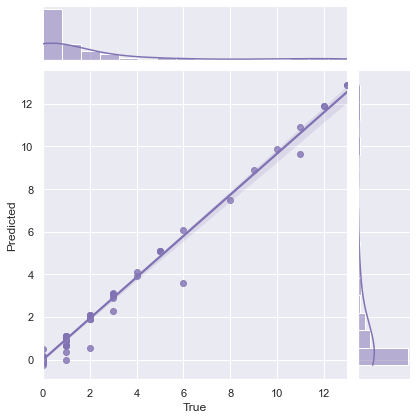

In [113]:
import seaborn as sns
sns.set(style='darkgrid')
g = sns.jointplot("True","Predicted",data=data,kind="reg",color="m")

## Explore Neighborhoods in Manila

In [116]:
manila_neighborhoods = pd.read_csv('data_manila.csv')
manila_neighborhoods.shape

(38, 6)

In [118]:
manila_neighborhoods.head()

,Unnamed: 0,postalcode,Borough,loc,lat,lon
0,0,900,"Manila Bulletin,Manila","Manila Bulletin, Muralla Street, Barangay 657,...",14.588223,120.978552
1,1,904,"Midland Plaza Manila Hotel,Manila","Midland Plaza Manila Hotel, Santa Monica Stree...",14.576926,120.982775
2,2,906,"Manila Medical Center,Manila","Manila, Bonifacio Village, Pingki-an 2, Quezon...",14.677324,121.064665
3,3,907,"San Miguel Corporation,Manila","San Miguel Corporation, Mandaluyong, Second Di...",14.582773,121.058949
4,4,909,"Summer Institute of Linguistics,Manila","SIL Manila Guest House, Big Horseshoe Drive, H...",14.612002,121.038064


In [119]:
manila_neighborhoods=manila_neighborhoods.drop(columns='Unnamed: 0')

In [121]:
manila_neighborhoods.head()

,postalcode,Borough,loc,lat,lon
0,900,"Manila Bulletin,Manila","Manila Bulletin, Muralla Street, Barangay 657,...",14.588223,120.978552
1,904,"Midland Plaza Manila Hotel,Manila","Midland Plaza Manila Hotel, Santa Monica Stree...",14.576926,120.982775
2,906,"Manila Medical Center,Manila","Manila, Bonifacio Village, Pingki-an 2, Quezon...",14.677324,121.064665
3,907,"San Miguel Corporation,Manila","San Miguel Corporation, Mandaluyong, Second Di...",14.582773,121.058949
4,909,"Summer Institute of Linguistics,Manila","SIL Manila Guest House, Big Horseshoe Drive, H...",14.612002,121.038064


## Explore venues in Manila

In [123]:
manila_venues=getNearbyVenues(names=manila_neighborhoods['Borough'], 
                               latitudes=manila_neighborhoods['lat'], 
                               longitudes=manila_neighborhoods['lon'], 
                               radius=500)

Manila Bulletin,Manila
Midland Plaza Manila Hotel,Manila
Manila Medical Center,Manila
San Miguel Corporation,Manila
Summer Institute of Linguistics,Manila
Department of Labor and Employment,Manila
Philippine Statistics Authority,Manila
Bureau of Plant Industry,Manila
Manila Hotel,Manila
Radio Veritas,Manila
Ateneo de Manila University,Manila
Manila Police District,Manila
Sofitel Philippine Plaza,Manila
De La Salle University,Manila
Chinabank,Manila
Philippine Veterans Affairs Office,Manila
Philippine National Bank,Manila
Department of Justice,Manila
Asian Development Bank,Manila
Manila Central Post Office,Manila
Quiapo,Manila
Intramuros,Manila
Santa Cruz (South),Manila
Malate,Manila
San Miguel,Manila
Binondo,Manila
Paco,Manila
Sampaloc (East),Manila
Santa Ana,Manila
San Nicolas,Manila
Pandacan,Manila
Tondo (South),Manila
Tondo (North),Manila
Santa Cruz (North),Manila
Sampaloc (West),Manila
Santa Mesa,Manila
San Andres,Manila
Port Area (South),Manila


In [124]:
manila_venues.shape

(1434, 7)

In [125]:
manila_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Manila Bulletin,Manila",14.588223,120.978552,Silahis Art and Artifacts,14.587427,120.977411,Antique Shop
1,"Manila Bulletin,Manila",14.588223,120.978552,Ilustrado,14.587788,120.977454,Spanish Restaurant
2,"Manila Bulletin,Manila",14.588223,120.978552,Skydeck Lounge,14.589915,120.978756,Roof Deck
3,"Manila Bulletin,Manila",14.588223,120.978552,The Bayleaf Hotel,14.589945,120.978808,Hotel
4,"Manila Bulletin,Manila",14.588223,120.978552,Coco Bango Cafe,14.589654,120.975609,Asian Restaurant


In [126]:
manila_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Asian Development Bank,Manila",100,100,100,100,100,100
"Ateneo de Manila University,Manila",45,45,45,45,45,45
"Binondo,Manila",100,100,100,100,100,100
"Bureau of Plant Industry,Manila",49,49,49,49,49,49
"Chinabank,Manila",4,4,4,4,4,4
"De La Salle University,Manila",69,69,69,69,69,69
"Department of Justice,Manila",84,84,84,84,84,84
"Department of Labor and Employment,Manila",35,35,35,35,35,35
"Intramuros,Manila",53,53,53,53,53,53


In [127]:
print('There are {} unique catergories'.format(len(manila_venues['Venue Category'].unique())))

There are 188 unique catergories


In [128]:
# one hot encoding
manila_onehot = pd.get_dummies(manila_venues[['Venue Category']],prefix="",prefix_sep="")

In [131]:
manila_onehot['Neighborhoods'] = manila_venues['Neighborhood']

In [132]:
# rearrangement of columns
fixed_columns=[manila_onehot.columns[-1]]+list(manila_onehot.columns[:-1])
manila_onehot=manila_onehot[fixed_columns]

In [138]:
manila_onehot.shape

(1434, 189)

In [134]:
manila_onehot.head()

,Neighborhoods,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Australian Restaurant,BBQ Joint,Baby Store,Badminton Court,Bakery,Bar,Basketball Court,Beach,Beer Garden,Boarding House,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Cantonese Restaurant,Casino,Castle,Cha Chaan Teng,Chinese Aristocrat Restaurant,Chinese Restaurant,Church,Clothing Store,Coffee Shop,College Auditorium,College Cafeteria,Comedy Club,Comfort Food Restaurant,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cruise Ship,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,German Restaurant,Gift Shop,Golf Course,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nail Salon,National Park,Nightclub,Noodle House,Other Great Outdoors,Paper / Office Supplies Store,Park,Parking,Pet Store,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Pool,Public Art,Radio Station,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shawarma Place,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Track Stadium,Trail,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Water Park,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Manila Bulletin,Manila",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Manila Bulletin,Manila",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Manila Bulletin,Manila",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Manila Bulletin,Manila",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### obtain the number of each category in different neighborhoods

In [136]:
manila_grouped = manila_onehot.groupby('Neighborhoods').sum().reset_index()

In [137]:
manila_grouped.head()

,Neighborhoods,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Australian Restaurant,BBQ Joint,Baby Store,Badminton Court,Bakery,Bar,Basketball Court,Beach,Beer Garden,Boarding House,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Cantonese Restaurant,Casino,Castle,Cha Chaan Teng,Chinese Aristocrat Restaurant,Chinese Restaurant,Church,Clothing Store,Coffee Shop,College Auditorium,College Cafeteria,Comedy Club,Comfort Food Restaurant,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cruise Ship,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,German Restaurant,Gift Shop,Golf Course,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nail Salon,National Park,Nightclub,Noodle House,Other Great Outdoors,Paper / Office Supplies Store,Park,Parking,Pet Store,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Pool,Public Art,Radio Station,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shawarma Place,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Track Stadium,Trail,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Water Park,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Asian Development Bank,Manila",1,1,0,0,1,1,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0,0,0,4,3,0,1,1,0,0,3,0,0,0,0,0,0,1,1,4,7,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,1,0,0,1,0,1,0,0,0,0,6,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2,5,0,3,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,2,0,1,3,0,1,0,0,1,1,2,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,1,1,3,0
1,"Ateneo de Manila University,Manila",0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,3,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0,0,0,1,0,0,0,0,2,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,"Binondo,Manila",0,0,0,0,0,0,0,2,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,5,0,0,0,0,0,0,28,1,1,2,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,3,0,0,0,3,1,0,0,0,0,6,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,4,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,"Bureau of Plant Industry,Manila",0,0,0,1,0,0,0,0,0,1,0,0,0,6,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,4,0,0,0,0,0,0,0,0,0,5,0,0,1,0,3,0,0,0,0,0,0,0,0,0,2,0,1

In [170]:
manila_grouped.shape

(38, 189)

In [141]:
manila_coffee=manila_grouped[['Neighborhoods','Coffee Shop']]

In [150]:
address = 'Manila'

geolocator = Nominatim(user_agent="manila_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manila are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manila are 14.5907332, 120.9809674.


In [142]:
manila_coffee_df=manila_neighborhoods.merge(manila_coffee,left_on='Borough',right_on='Neighborhoods',how='inner')

In [144]:
manila_coffee_df=manila_coffee_df.drop(columns='Borough')

In [145]:
manila_coffee_df

,postalcode,loc,lat,lon,Neighborhoods,Coffee Shop
0,900,"Manila Bulletin, Muralla Street, Barangay 657,...",14.588223,120.978552,"Manila Bulletin,Manila",3
1,904,"Midland Plaza Manila Hotel, Santa Monica Stree...",14.576926,120.982775,"Midland Plaza Manila Hotel,Manila",4
2,906,"Manila, Bonifacio Village, Pingki-an 2, Quezon...",14.677324,121.064665,"Manila Medical Center,Manila",0
3,907,"San Miguel Corporation, Mandaluyong, Second Di...",14.582773,121.058949,"San Miguel Corporation,Manila",5
4,909,"SIL Manila Guest House, Big Horseshoe Drive, H...",14.612002,121.038064,"Summer Institute of Linguistics,Manila",2
5,910,"Department of Labor and Employment, General Lu...",14.587209,120.977879,"Department of Labor and Employment,Manila",1
6,911,"Philippine Statistics Authority, Pureza Street...",14.603355,121.003728,"Philippine Statistics Authority,Manila",0
7,912,"Bureau of Plant Industry, Malate, Fifth Distri...",14.570108,120.990223,"Bureau of Plant Industry,Manila",5
8,913,"Manila Hotel, Bonifacio Drive, Barangay 657, I...",14.583323,120.973858,"Manila Hotel,Manila",0
9,916,"Radio Veritas Asia, Buick, Fairview, Quezon Ci...",14.700146,121.071774,"Radio Veritas,Manila",1


### Display the scales of coffee shops in each neighborhoods

In [205]:
map_manila = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood,radius in zip(manila_coffee_df['lat'],manila_coffee_df['lon'], manila_coffee_df['Neighborhoods'],manila_coffee_df['Coffee Shop']):
    label = '{},'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=np.exp(radius-3.8),
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manila)  
    
map_manila

### Recommendation from model

In [157]:
template=pd.DataFrame(columns=toronto_grouped.columns)
template=template.merge(manila_grouped,how='outer')

In [160]:
template.head()

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,Aquarium,Athletics & Sports,Auto Garage,Auto Workshop,Bagel Shop,Bank,Baseball Field,Baseball Stadium,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Brazilian Restaurant,Brewery,Bus Line,Bus Stop,Business Service,Butcher,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chocolate Shop,Climbing Gym,Cocktail Bar,College Arts Building,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Coworking Space,Cuban Restaurant,Curling Ice,Distribution Center,Doner Restaurant,Drugstore,Eastern European Restaurant,Escape Room,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food Service,Fruit & Vegetable Store,Gaming Cafe,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gluten-free Restaurant,Gourmet Shop,Hakka Restaurant,Harbor / Marina,Hardware Store,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,IT Services,Indie Movie Theater,Irish Pub,Jazz Club,Kids Store,Korean BBQ Restaurant,Lake,Light Rail Station,Lingerie Store,Martial Arts School,Medical Center,Metro Station,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Performing Arts Venue,Piano Bar,Plane,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Rental Car Location,River,Sake Bar,Scenic Lookout,Sculpture Garden,Skate Park,Smoke Shop,Smoothie Shop,Soccer Field,Soup Place,Speakeasy,Stationery Store,Strip Club,Supplement Shop,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Train Station,Turkish Restaurant,Video Game Store,Video Store,Warehouse Store,Wine Shop,Neighborhoods,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Australian Restaurant,BBQ Joint,Baby Store,Badminton Court,Bakery,Bar,Basketball Court,Beach,Beer Garden,Boarding House,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Cantonese Restaurant,Casino,Castle,Cha Chaan Teng,Chinese Aristocrat Restaurant,Chinese Restaurant,Church,Clothing Store,Coffee Shop,College Auditorium,College Cafeteria,Comedy Club,Comfort Food Restaurant,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cruise Ship,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,German Restaurant,Gift Shop,Golf Course,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Insurance Office,Internet Cafe,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nail Salon,National Park,Nightclub,Noodle House,Other Great Outdoors,Paper / Office Supplies Store,Park,Parking,Pet Store,Pharmacy,Pizza Place,Planetarium,Playground,P

In [158]:
template.shape

(38, 325)

In [173]:
manila_df_prepare=template[toronto_grouped.columns].copy()

In [174]:
manila_df_prepare.fillna(0,inplace=True)
manila_df_prepare.head()

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,3,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,4,0,1,1,0,0,0,0,0,3,0,0,0,0,1,0,1,0,4,0,7,0,0,0,0,0,0,0,0,0,0,0,2,0,0,

In [175]:
manila_df_prepare['Neighborhood']=manila_grouped['Neighborhoods']

In [176]:
manila_df_prepare

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Asian Development Bank,Manila",3,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,4,0,1,1,0,0,0,0,0,3,0,0,0,0,1,0,1,0,4,0,

### predict Coffee shop number based on trained model of Toronto

In [177]:
X_test = manila_df_prepare.drop(['Neighborhood','Coffee Shop'],axis=1)
y_real = manila_df_prepare['Coffee Shop']
y_predict = regr.predict(X_test)


In [178]:
manila_data=pd.DataFrame([manila_df_prepare['Neighborhood'],y_real,y_predict], index=['Neighborhood','Real','Predicted'])
manila_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
Neighborhood,"Asian Development Bank,Manila","Ateneo de Manila University,Manila","Binondo,Manila","Bureau of Plant Industry,Manila","Chinabank,Manila","De La Salle University,Manila","Department of Justice,Manila","Department of Labor and Employment,Manila","Intramuros,Manila","Malate,Manila","Manila Bulletin,Manila","Manila Central Post Office,Manila","Manila Hotel,Manila","Manila Medical Center,Manila","Manila Police District,Manila","Midland Plaza Manila Hotel,Manila","Paco,Manila","Pandacan,Manila","Philippine National Bank,Manila","Philippine Statistics Authority,Manila","Philippine Veterans Affairs Office,Manila","Port Area (South),Manila","Quiapo,Manila","Radio Veritas,Manila","Sampaloc (East),Manila","Sampaloc (West),Manila","San Andres,Manila","San Miguel Corporation,Manila","San Miguel,Manila","San Nicolas,Manila","Santa Ana,Manila","Santa Cruz (North),Manila","Santa Cruz (South),Manila","Santa Mesa,Manila","Sofitel Philippine Plaza,Manila","Summer Institute of Linguistics,Manila","Tondo (North),Manila","Tondo (South),Manila"
Real,7,3,2,5,0,6,5,1,4,6,3,4,0,0,1,4,0,0,2,0,0,0,1,1,1,1,6,5,1,0,0,1,1,0,0,2,1,1
Predicted,7.71973,4.51234,7.91375,4.93624,0.303215,6.43709,7.1201,4.13769,5.66813,3.85089,3.78061,1.41629,4.6758,-0.162882,2.00421,2.87095,1.96539,0.289876,3.77915,3.95848,-0.188473,-0.0767481,6.82703,1.62733,2.60421,2.60421,3.75453,7.28101,3.41263,0.208289,-0.0595311,7.91384,7.91384,0.437602,2.47908,6.68415,0.375307,0.375307


In [179]:
manila_data=manila_data.T

In [180]:
manila_data

,Neighborhood,Real,Predicted
0,"Asian Development Bank,Manila",7,7.71973
1,"Ateneo de Manila University,Manila",3,4.51234
2,"Binondo,Manila",2,7.91375
3,"Bureau of Plant Industry,Manila",5,4.93624
4,"Chinabank,Manila",0,0.303215
5,"De La Salle University,Manila",6,6.43709
6,"Department of Justice,Manila",5,7.1201
7,"Department of Labor and Employment,Manila",1,4.13769
8,"Intramuros,Manila",4,5.66813
9,"Malate,Manila",6,3.85089


In [181]:
manila_data.Predicted=manila_data.Predicted.astype(float).round().astype(int)
manila_data.head()

,Neighborhood,Real,Predicted
0,"Asian Development Bank,Manila",7,8
1,"Ateneo de Manila University,Manila",3,5
2,"Binondo,Manila",2,8
3,"Bureau of Plant Industry,Manila",5,5
4,"Chinabank,Manila",0,0


### Calculate the difference between predicted and real number of coffee shop

In [182]:
manila_data['difference']=manila_data['Predicted']-manila_data['Real']
manila_data.head()

,Neighborhood,Real,Predicted,difference
0,"Asian Development Bank,Manila",7,8,1
1,"Ateneo de Manila University,Manila",3,5,2
2,"Binondo,Manila",2,8,6
3,"Bureau of Plant Industry,Manila",5,5,0
4,"Chinabank,Manila",0,0,0


In [185]:
manila_data.sort_values('difference',ascending=False,inplace=True)
manila_data.head(10)

,Neighborhood,Real,Predicted,difference
31,"Santa Cruz (North),Manila",1,8,7
32,"Santa Cruz (South),Manila",1,8,7
2,"Binondo,Manila",2,8,6
22,"Quiapo,Manila",1,7,6
12,"Manila Hotel,Manila",0,5,5
35,"Summer Institute of Linguistics,Manila",2,7,5
19,"Philippine Statistics Authority,Manila",0,4,4
7,"Department of Labor and Employment,Manila",1,4,3
8,"Intramuros,Manila",4,6,2
1,"Ateneo de Manila University,Manila",3,5,2


#### plot the top 10 recommended neighborhoods

Text(0, 0.5, '# of Coffee Shop')

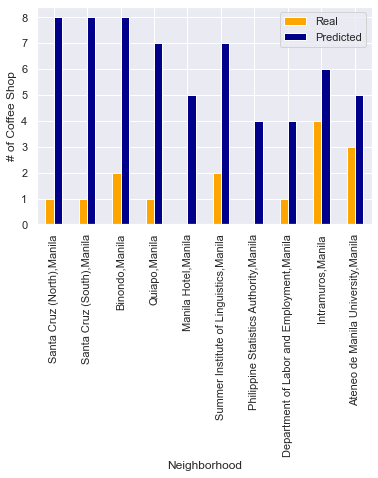

In [186]:
ax=manila_data.set_index('Neighborhood').iloc[:10,0:2].plot(kind='bar',color=['orange','darkblue'])
ax.set_ylabel("# of Coffee Shop")

### Plot these neighborhoods on the map

In [189]:
manila_plot=manila_data.iloc[:10,:].merge(manila_neighborhoods,how='left',left_on='Neighborhood',right_on='Borough')

In [190]:
manila_plot

,Neighborhood,Real,Predicted,difference,postalcode,Borough,loc,lat,lon
0,"Santa Cruz (North),Manila",1,8,7,1014,"Santa Cruz (North),Manila","Santa Cruz, Third District, Manila, First Dist...",14.599837,120.980196
1,"Santa Cruz (South),Manila",1,8,7,1003,"Santa Cruz (South),Manila","Santa Cruz, Third District, Manila, First Dist...",14.599837,120.980196
2,"Binondo,Manila",2,8,6,1006,"Binondo,Manila","Binondo, Third District, Manila, First Distric...",14.599916,120.974025
3,"Quiapo,Manila",1,7,6,1001,"Quiapo,Manila","Quiapo, Third District, Manila, First District...",14.598139,120.987364
4,"Manila Hotel,Manila",0,5,5,913,"Manila Hotel,Manila","Manila Hotel, Bonifacio Drive, Barangay 657, I...",14.583323,120.973858
5,"Summer Institute of Linguistics,Manila",2,7,5,909,"Summer Institute of Linguistics,Manila","SIL Manila Guest House, Big Horseshoe Drive, H...",14.612002,121.038064
6,"Philippine Statistics Authority,Manila",0,4,4,911,"Philippine Statistics Authority,Manila","Philippine Statistics Authority, Pureza Street...",14.603355,121.003728
7,"Department of Labor and Employment,Manila",1,4,3,910,"Department of Labor and Employment,Manila","Department of Labor and Employment, General Lu...",14.587209,120.977879
8,"Intramuros,Manila",4,6,2,1002,"Intramuros,Manila","Intramuros, Fifth District, Manila, First Dist...",14.590586,120.975330
9,"Ateneo de Manila University,Manila",3,5,2,917,"Ateneo de Manila University,Manila","Ateneo de Manila University, Katipunan Avenue,...",14.639898,121.078195


In [192]:
map_manila = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, neighborhood in zip(manila_plot['lat'],manila_plot['lon'], manila_plot['Neighborhood']):
    label = '{},'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manila)  
    
map_manila